# IVÁN FALCÓN MONZÓN

In [1]:
# IVAN FALCON MONZON
# Importación de librerías necesarias
import seaborn as sns  # Para cargar datasets.
import pandas as pd  # Para manipulación de datos tabulares.
import numpy as np  # Para operaciones numéricas y de matrices.
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB  # Clasificadores Naive Bayes.
from sklearn.metrics import accuracy_score, confusion_matrix  # Para evaluar el modelo.
import matplotlib.pyplot as plt  # Para graficar la matriz de confusión.
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder  # Para codificar variables categóricas.
from sklearn.utils.multiclass import unique_labels # Para obtener las clases únicas presentes en los datos de clasificación.

**Función plot_confusion_matrix**

In [2]:
# Función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    Esta función imprime y dibuja la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computa la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    # Usamos solo las etiquetas que aparecen en los datos
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Queremos mostrar todas las etiquetas...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... y etiquetarlas con las entradas respectivas
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rota las etiquetas de los ticks y ajusta su alineación.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Recorre las dimensiones de los datos y crea anotaciones de texto.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Dataset Iris

Clasificador: GaussianNB
Confusion matrix, without normalization
[[17  0  0]
 [ 0 17  2]
 [ 0  1 13]]


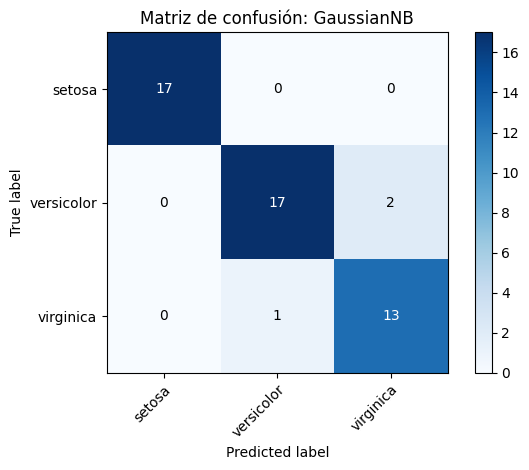

Clasificador: MultinomialNB
Confusion matrix, without normalization
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]


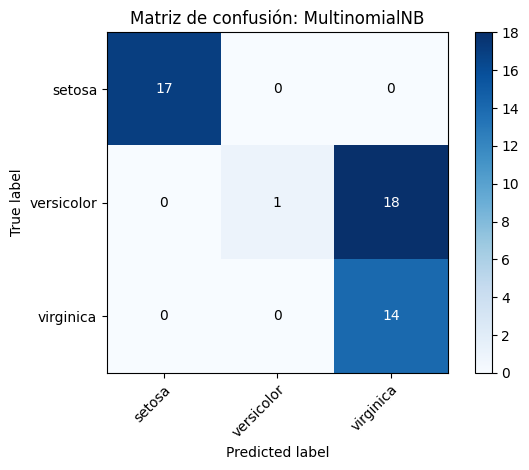

Clasificador: ComplementNB
Confusion matrix, without normalization
[[17  0  0]
 [ 0  0 19]
 [ 0  0 14]]


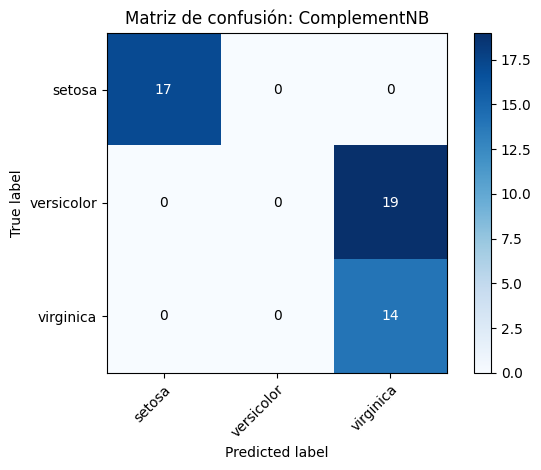

Clasificador: BernoulliNB
Confusion matrix, without normalization
[[ 0  0 17]
 [ 0  0 19]
 [ 0  0 14]]


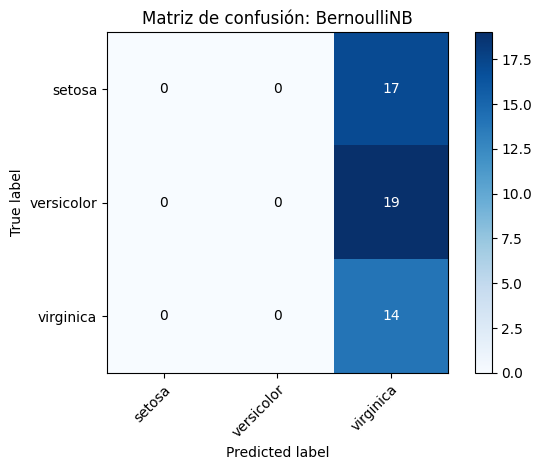

Clasificador: CategoricalNB
Confusion matrix, without normalization
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]


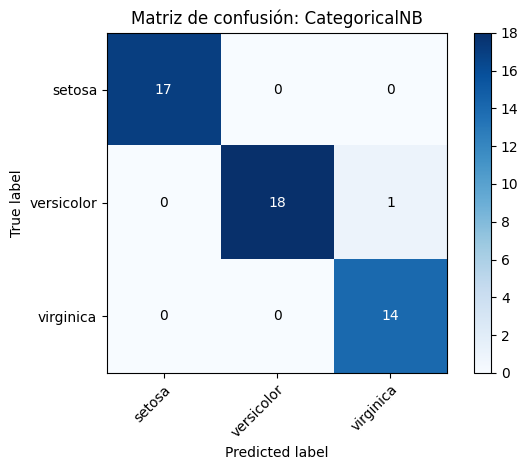

    Clasificador  Precisión
0     GaussianNB       0.94
1  MultinomialNB       0.64
2   ComplementNB       0.62
3    BernoulliNB       0.28
4  CategoricalNB       0.98


In [3]:
# IVAN FALCON MONZON
# Función para preprocesar datos categóricos para Iris
def preprocess_data_iris(dataset, target_column):
    """
    Preprocesa el dataset Iris, separando las características y el objetivo
    y codificando la columna objetivo en valores numéricos.

    Parámetros:
    - dataset: DataFrame de pandas que contiene el dataset Iris.
    - target_column: Nombre de la columna objetivo (species).

    Retorna:
    - X.values: Características del dataset en formato NumPy.
    - y: Valores numéricos codificados de la columna objetivo.
    - target_classes: Clases originales de la columna objetivo.
    """
    # Separa las características (X) y la columna objetivo (y)
    X = dataset.drop(target_column, axis=1)  # Elimina la columna objetivo del dataset
    y = dataset[target_column]  # Almacena únicamente la columna objetivo

    # Codifica las clases de la columna objetivo en valores numéricos (0, 1, 2)
    label_enc = LabelEncoder()  # Inicializa el codificador
    y = label_enc.fit_transform(y)  # Convierte las clases de texto a enteros
    target_classes = label_enc.classes_  # Guarda las etiquetas originales para referencia

    return X.values, y, target_classes  # Devuelve los datos procesados

# Función para evaluar clasificadores con Iris
def evaluate_naive_bayes_iris(dataset, target_column):
    """
    Evalúa varios clasificadores Naive Bayes en el dataset Iris y muestra
    la precisión y la matriz de confusión de cada clasificador.

    Parámetros:
    - dataset: DataFrame de pandas que contiene el dataset Iris.
    - target_column: Nombre de la columna objetivo (species).

    Retorna:
    - results_df: DataFrame con los nombres de los clasificadores y sus precisiones.
    """
    # Preprocesa los datos para obtener características (X), etiquetas (y) y clases objetivo
    X, y, target_classes = preprocess_data_iris(dataset, target_column)

    # Divide los datos en conjunto de entrenamiento (67%) y prueba (33%)
    Xtrain, Xtest, ytrain, ytest = train_test_split(
        X, y, test_size=0.33, random_state=1
    )

    # Define los clasificadores Naive Bayes a evaluar
    classifiers = {
        "GaussianNB": GaussianNB(),         # Clasificador basado en distribución Gaussiana
        "MultinomialNB": MultinomialNB(),   # Clasificador para datos discretos con distribución multinomial
        "ComplementNB": ComplementNB(),     # Variante de MultinomialNB, robusta a clases desbalanceadas
        "BernoulliNB": BernoulliNB(),       # Clasificador para datos binarios
        "CategoricalNB": CategoricalNB()    # Clasificador para datos categóricos
    }

    results = []  # Lista para almacenar resultados de cada clasificador

    for name, model in classifiers.items():
        try:
            # Entrena el modelo con el conjunto de entrenamiento
            model.fit(Xtrain, ytrain)

            # Realiza predicciones en el conjunto de prueba
            y_pred = model.predict(Xtest)

            # Calcula la precisión del modelo y almacena los resultados
            acc = accuracy_score(ytest, y_pred)
            results.append((name, acc))

            # Genera y muestra la matriz de confusión
            print(f"Clasificador: {name}")
            plot_confusion_matrix(
                ytest, y_pred, classes=target_classes,
                title=f"Matriz de confusión: {name}"
            )
            plt.show()  # Muestra el gráfico
        except Exception as e:
            # Captura y muestra errores si un clasificador falla
            print(f"Error con {name}: {e}")

    # Crea un DataFrame con los resultados y los imprime
    results_df = pd.DataFrame(results, columns=["Clasificador", "Precisión"])
    print(results_df)
    return results_df  # Devuelve los resultados

# Dataset Iris
iris = sns.load_dataset('iris')  # Carga el dataset Iris directamente desde seaborn
iris_results = evaluate_naive_bayes_iris(iris, 'species')  # Llama a la función de evaluación

# Dataset Penguin

Clasificador: GaussianNB
Confusion matrix, without normalization
[[43  4  0]
 [ 0 27  0]
 [ 0  0 36]]


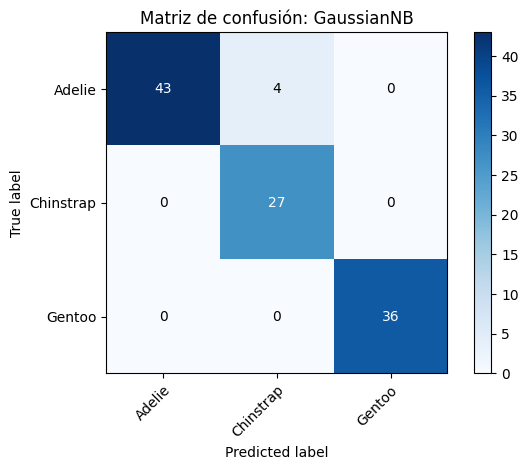

Clasificador: MultinomialNB
Confusion matrix, without normalization
[[39  6  2]
 [11 16  0]
 [ 4  0 32]]


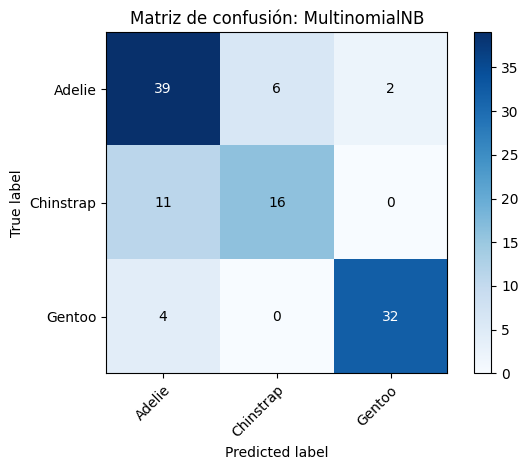

Clasificador: ComplementNB
Confusion matrix, without normalization
[[36  0 11]
 [24  0  3]
 [ 0  0 36]]


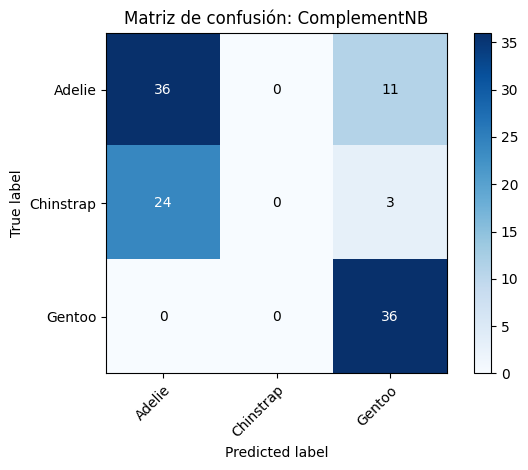

Clasificador: BernoulliNB
Confusion matrix, without normalization
[[36  0 11]
 [27  0  0]
 [ 0  0 36]]


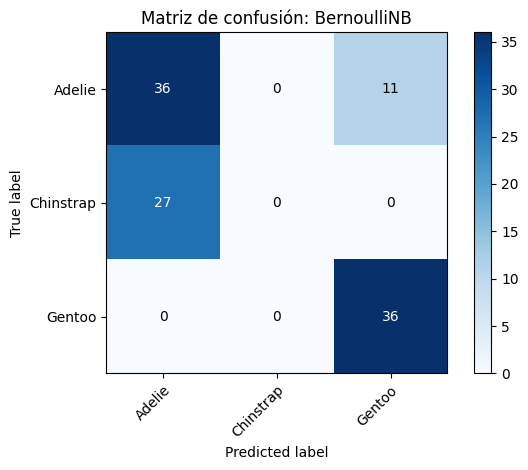

Clasificador: CategoricalNB
Confusion matrix, without normalization
[[46  1  0]
 [ 5 22  0]
 [ 0  0 36]]


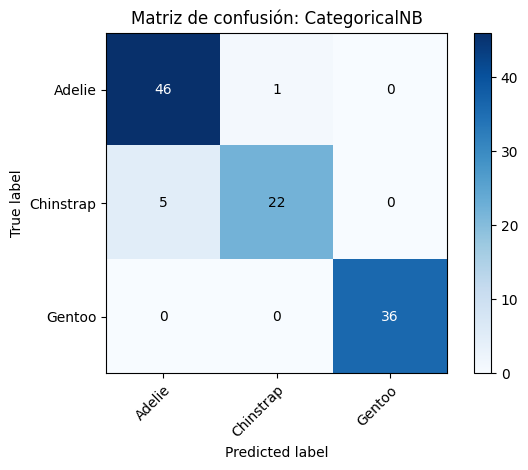

    Clasificador  Precisión
0     GaussianNB   0.963636
1  MultinomialNB   0.790909
2   ComplementNB   0.654545
3    BernoulliNB   0.654545
4  CategoricalNB   0.945455


In [4]:
# IVAN FALCON MONZON
# Función para preprocesar datos categóricos para Penguins
def preprocess_data_penguins(dataset, target_column):
    # Separar características y objetivo
    X = dataset.drop(target_column, axis=1)
    y = dataset[target_column]

    # Codificar la columna objetivo
    label_enc = LabelEncoder()
    y = label_enc.fit_transform(y)
    target_classes = label_enc.classes_

    # Codificar características con OrdinalEncoder
    ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_encoded = ordinal_enc.fit_transform(X.select_dtypes(include=['object', 'category']).astype(str))
    X_other = X.select_dtypes(exclude=['object', 'category'])
    X_processed = np.hstack([X_other.values, X_encoded])

    return X_processed, y, target_classes, ordinal_enc

# Función para evaluar clasificadores con Penguins
def evaluate_naive_bayes_penguins(dataset, target_column):
    # Preprocesamos el dataset
    X, y, target_classes, ordinal_enc = preprocess_data_penguins(dataset, target_column)

    # Dividimos en conjunto de entrenamiento y prueba
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

    classifiers = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "ComplementNB": ComplementNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB()
    }

    results = []
    for name, model in classifiers.items():
        try:
            if name == "CategoricalNB":
                # Ajustar categorías en Xtest para que sean válidas
                for col in range(Xtest.shape[1]):
                    Xtest[:, col] = np.clip(Xtest[:, col], 0, Xtrain[:, col].max())

            # Entrenamiento
            model.fit(Xtrain, ytrain)
            # Predicción
            y_pred = model.predict(Xtest)
            # Evaluación
            acc = accuracy_score(ytest, y_pred)
            results.append((name, acc))
            # Matriz de confusión
            print(f"Clasificador: {name}")
            plot_confusion_matrix(ytest, y_pred, classes=target_classes, title=f"Matriz de confusión: {name}")
            plt.show()
        except Exception as e:
            print(f"Error con {name}: {e}")

    # Mostrar resultados
    results_df = pd.DataFrame(results, columns=["Clasificador", "Precisión"])
    print(results_df)
    return results_df

# Dataset Penguins
penguins = sns.load_dataset('penguins').dropna()  # Manejo de valores nulos
penguin_results = evaluate_naive_bayes_penguins(penguins, 'species')

# COMPARACIÓN

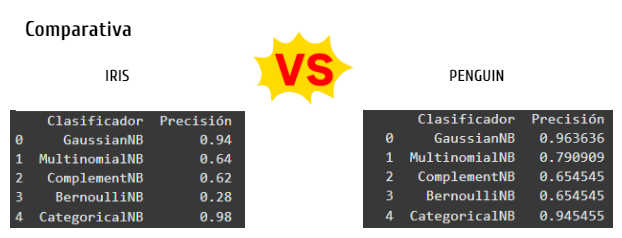

**0. GaussianNB:**
 * Iris: Precisión de 0.94.
 * Penguin: Precisión de 0.963636.
 * Conclusión: GaussianNB tiene un rendimiento excelente en ambos datasets, siendo ligeramente mejor para el dataset Penguin. Este modelo es adecuado cuando los datos tienen una distribución gaussiana o normal, como parece ser el caso en ambas situaciones.

**1. MultinomialNB:**
 * Iris: Precisión de 0.64.
 * Penguin: Precisión de 0.790909.
 * Conclusión: MultinomialNB funciona mejor con el dataset Penguin, probablemente debido a la naturaleza de los datos discretos. Para el dataset Iris, su rendimiento es inferior, indicando que quizás no sea el modelo ideal para características continuas.

**2. ComplementNB:**
 * Iris: Precisión de 0.62.
 * Penguin: Precisión de 0.654545.
 * Conclusión: ComplementNB tiene un rendimiento bajo en ambos casos, aunque muestra una ligera mejora con el dataset Penguin. Este modelo podría no ser ideal para los datasets utilizados, ya que está diseñado para manejar clases desbalanceadas.

**3. BernoulliNB:**
* Iris: Precisión de 0.28.
* Penguin: Precisión de 0.654545.
* Conclusión: BernoulliNB tiene un desempeño significativamente mejor con el dataset Penguin. Dado que este modelo está diseñado para datos binarios, su baja precisión en Iris podría indicar que las características continuas no son adecuadas para este clasificador.

**4. CategoricalNB:**
* Iris: Precisión de 0.98.
* Penguin: Precisión de 0.945455.
* Conclusión: CategoricalNB tiene un rendimiento excepcional en ambos datasets, aunque es ligeramente mejor en Iris. Este modelo es ideal cuando las características son categóricas, lo que puede explicar su alto rendimiento en ambos casos.

Conclusiones:
* Dataset Iris:
  * Mejor clasificador: CategoricalNB (0.98). Es el modelo más adecuado, ya que alcanza la mayor precisión.
  * Alternativa: GaussianNB (0.94). Si las características se aproximan a una distribución normal, también es una buena opción.
* Dataset Penguin:
  * Mejor clasificador: GaussianNB (0.963636). Presenta el mejor rendimiento.
  * Alternativa: CategoricalNB (0.945455). Funciona muy bien si las características son categóricas.


En resumen, el clasificador más preciso depende de la naturaleza de los datos. CategoricalNB domina en Iris, mientras que GaussianNB lidera en Penguin.
